<a href="https://colab.research.google.com/github/abhinav-k13/PatternReco_Lab/blob/main/PRLab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
)

In [13]:
# Load Dataset
df = pd.read_csv("/content/weatherAUS.csv")

In [14]:
# Drop irrelevant columns
df.drop(columns=["Date", "RISK_MM"], inplace=True)

In [15]:
# Handle missing values
num_cols = df.select_dtypes(include=["float64"]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(include=["object"]).columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Encode categorical variables
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [16]:
# Split features and target
X = df.drop(columns=["RainTomorrow"])
y = df["RainTomorrow"]

In [17]:
# Standardize numerical features
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [18]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
# Train Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f" Accuracy: {accuracy:.4f}")
print(f" Precision: {precision:.4f}")
print(f" Recall: {recall:.4f}")
print(f" F1-Score: {f1:.4f}")
print(f" ROC-AUC Score: {roc_auc:.4f}")

 Accuracy: 0.8449
 Precision: 0.7274
 Recall: 0.4925
 F1-Score: 0.5874
 ROC-AUC Score: 0.8663


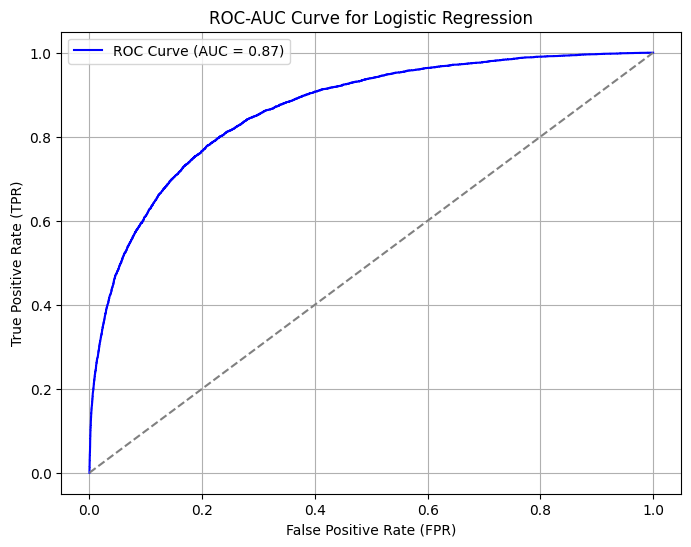

In [20]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Random classifier line
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC-AUC Curve for Logistic Regression")
plt.legend()
plt.grid()
plt.show()


In [21]:
# Check Overfitting or Underfitting
train_acc = log_reg.score(X_train, y_train)
test_acc = log_reg.score(X_test, y_test)

print(f" Training Accuracy: {train_acc:.4f}")
print(f" Testing Accuracy: {test_acc:.4f}")

 Training Accuracy: 0.8420
 Testing Accuracy: 0.8449


In [22]:
if train_acc > test_acc + 0.05:
    print(" The model is Overfitting.")
elif test_acc > train_acc + 0.05:
    print(" The model is Underfitting.")
else:
    print(" The model has a good fit.")

 The model has a good fit.


In [24]:
# Pick a random sample from the test set and predict
random_index = np.random.randint(0, X_test.shape[0])
sample_test = X_test.iloc[random_index]
actual_label = y_test.iloc[random_index]
predicted_label = log_reg.predict([sample_test])[0]

print(f" Actual Label: {'Rain' if actual_label == 1 else 'No Rain'}")
print(f" Predicted Label: {'Rain' if predicted_label == 1 else 'No Rain'}")

 Actual Label: No Rain
 Predicted Label: No Rain


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [27]:
# Generate random numerical feature values (same count as num_cols)
random_num_features = np.random.rand(len(num_cols)).reshape(1, -1)  # Ensure correct shape
random_num_features = scaler.transform(random_num_features)  # Scale numerical features

# Convert to DataFrame
random_df = pd.DataFrame(random_num_features, columns=num_cols)

# Add categorical features using mode values (most common value)
for col in cat_cols:
    random_df[col] = df[col].mode()[0]  # Fill with the most common category

# Ensure the column order matches training data
random_df = random_df[X_train.columns]

# Make a prediction
random_pred = log_reg.predict(random_df)[0]

print(f"\n Checking a Completely Random Sample:")
print(f" Predicted Label: {'Rain' if random_pred == 1 else 'No Rain'}")


 Checking a Completely Random Sample:
 Predicted Label: Rain


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
